# Introduction

Make Sure the to run the first cell in order to use TF v1.x


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [2]:
# !pip install tensorflow-gpu==1.12.2

# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
# !dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
# !apt-get update
# !apt-get install cuda=9.0.176-1

In [3]:
# Make sure Keras and Tensorflow version checks
!pip freeze | grep Keras
!pip freeze | grep tensorflow

Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.2
mesh-tensorflow==0.1.12
tensorflow==1.15.2
tensorflow-addons==0.8.3
tensorflow-datasets==4.0.1
tensorflow-estimator==1.15.1
tensorflow-gan==2.0.0
tensorflow-gcs-config==2.4.0
tensorflow-hub==0.10.0
tensorflow-metadata==0.26.0
tensorflow-privacy==0.2.2
tensorflow-probability==0.7.0


In [4]:
# install pendulum for time tracking. Utility
!pip install pendulum

     |████████████████████████████████| 163kB 9.6MB/s 
     |████████████████████████████████| 491kB 12.0MB/s 


In [8]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
%%time
# Unzip the training data
# Modify and uncomment the following code
#!unzip "/content/gdrive/MyDrive/Colab Notebooks/training.zip"

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs


In [8]:
# View the file inside the training folder
!ls training

driving_log.csv  IMG


In [26]:
import pandas as pd
import cv2
import imageio
import seaborn as sns
import matplotlib.pyplot as plt

# Simple Exploratory

In [12]:
training_df = pd.read_csv("training/driving_log.csv", header=None, names=[
    'center_img','left_img', 'right_img', 'steering_angle', 'throttle', 'break', 'speed']
                         )

In [26]:
training_df

,center_img,left_img,right_img,steering_angle,throttle,break,speed
0,center_2020_12_16_22_18_34_182.jpg,left_2020_12_16_22_18_34_182.jpg,right_2020_12_16_22_18_34_182.jpg,0.0,0.0,0.0,0.000006
1,center_2020_12_16_22_18_34_261.jpg,left_2020_12_16_22_18_34_261.jpg,right_2020_12_16_22_18_34_261.jpg,0.0,0.0,0.0,0.000007
2,center_2020_12_16_22_18_34_328.jpg,left_2020_12_16_22_18_34_328.jpg,right_2020_12_16_22_18_34_328.jpg,0.0,0.0,0.0,0.000014
3,center_2020_12_16_22_18_34_399.jpg,left_2020_12_16_22_18_34_399.jpg,right_2020_12_16_22_18_34_399.jpg,0.0,0.0,0.0,0.000002
4,center_2020_12_16_22_18_34_465.jpg,left_2020_12_16_22_18_34_465.jpg,right_2020_12_16_22_18_34_465.jpg,0.0,0.0,0.0,0.000001
...,...,...,...,...,...,...,...
26704,center_2020_12_16_23_30_09_012.jpg,left_2020_12_16_23_30_09_012.jpg,right_2020_12_16_23_30_09_012.jpg,0.0,0.0,0.0,4.520018
26705,center_2020_12_16_23_30_09_084.jpg,left_2020_12_16_23_30_09_084.jpg,right_2020_12_16_23_30_09_084.jpg,0.0,0.0,0.0,4.491565
26706,center_2020_12_16_23_30_09_162.jpg,left_2020_12_16_23_30_09_162.jpg,right_2020_12_16_23_30_09_162.jpg,0.0,0.0,0.0,4.453894
26707,center_2020_12_16_23_30_09_230.jpg,left_2020_12_16_23_30_09_230.jpg,right_2020_12_16_23_30_09_230.jpg,0.0,0.0,0.0,4.416525


In [19]:
training_df.shape

(26709, 7)

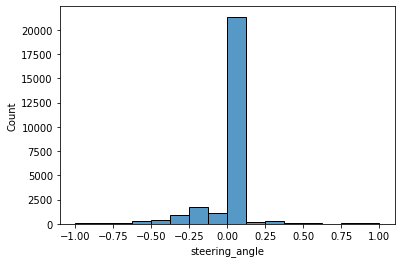

In [20]:
sns.histplot(data=training_df, x="steering_angle")

In [21]:
zero_angle = training_df.loc[training_df['steering_angle']==0]
non_zero = training_df.loc[training_df['steering_angle']!=0]

training_df = non_zero
training_df = training_df.append(zero_angle.sample(300))
training_df = training_df.reset_index(drop=True)

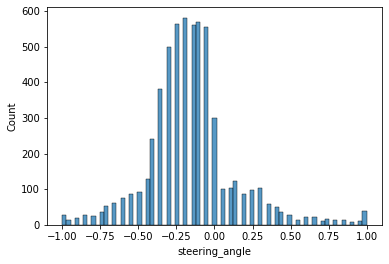

In [23]:
sns.histplot(data=training_df, x="steering_angle")

In [ ]:
# Image shape


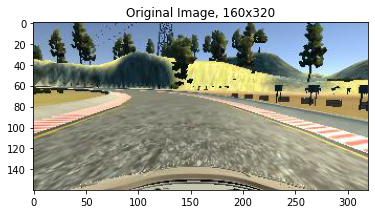

In [34]:
img = imageio.imread("training/IMG/"+ training_df.loc[0,'center_img'])
plt.imshow(img)
plt.title(f"Original Image, {img.shape[0]}x{img.shape[1]}")
plt.show()

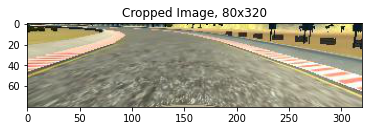

In [36]:
cropped_img = img[60:140,:]
plt.title(f"Cropped Image, {cropped_img.shape[0]}x{cropped_img.shape[1]}")
plt.imshow(cropped_img)
plt.show()

# Run the training

In [16]:
# Training the model
# IMPORTANT: UPLOAD THE THE model.py first!
!python model.py training --batch=128 --es-patience=1 --epoch=10 --artifact-dst=model.h5

Using TensorFlow backend.
2020-12-20 10:14:42.600961: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2020-12-20 10:14:42.601182: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2662a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-12-20 10:14:42.601220: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-12-20 10:14:42.603284: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-12-20 10:14:42.699695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-20 10:14:42.700386: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2662bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). De

In [37]:
# ### print the keys contained in the history object
# print(history.history.keys())

# ### plot the training and validation loss for each epoch
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model mean squared error loss')
# plt.ylabel('mean squared error loss')
# plt.xlabel('epoch')
# plt.legend(['training set', 'validation set'], loc='upper right')
# plt.show()